## Data exploration

In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('log_noERR')

In [3]:
df=df[(df['Cod']== 2) |(df['Cod']== 3)]
df.head()

,Unnamed: 0,Time,num,Type,Cod,Message
1,1,2022-05-05 15:09:18,133,INFO,2,Numero di stream online: 1597
2,2,2022-05-05 15:09:25,487,INFO,3,Numero di spettatori online: 44353
5,5,2022-05-05 15:14:18,425,INFO,2,Numero di stream online: 1658
6,6,2022-05-05 15:14:26,874,INFO,3,Numero di spettatori online: 45230
9,9,2022-05-05 15:19:40,947,INFO,2,Numero di stream online: 1692


In [4]:
df['Num'] = df['Message'].str.split(':').str[1]

In [5]:
df.head()

,Unnamed: 0,Time,num,Type,Cod,Message,Num
1,1,2022-05-05 15:09:18,133,INFO,2,Numero di stream online: 1597,1597
2,2,2022-05-05 15:09:25,487,INFO,3,Numero di spettatori online: 44353,44353
5,5,2022-05-05 15:14:18,425,INFO,2,Numero di stream online: 1658,1658
6,6,2022-05-05 15:14:26,874,INFO,3,Numero di spettatori online: 45230,45230
9,9,2022-05-05 15:19:40,947,INFO,2,Numero di stream online: 1692,1692


In [6]:
#convert string column type in int
df['Num'] = pd.to_numeric(df['Num'])

In [7]:
times=[]
for time in  df['Time']:
    times.append(datetime.strptime(time, '%Y-%m-%d %H:%M:%S'))
df['Time']= times    

In [8]:
df['Hour']= df['Time'].dt.hour

In [9]:
df.head()

,Unnamed: 0,Time,num,Type,Cod,Message,Num,Hour
1,1,2022-05-05 15:09:18,133,INFO,2,Numero di stream online: 1597,1597,15
2,2,2022-05-05 15:09:25,487,INFO,3,Numero di spettatori online: 44353,44353,15
5,5,2022-05-05 15:14:18,425,INFO,2,Numero di stream online: 1658,1658,15
6,6,2022-05-05 15:14:26,874,INFO,3,Numero di spettatori online: 45230,45230,15
9,9,2022-05-05 15:19:40,947,INFO,2,Numero di stream online: 1692,1692,15


In [10]:
streamon= df[df['Cod']== 2]

In [11]:
streamon=streamon.groupby('Hour')['Num'].mean()

In [12]:
streamon= streamon.to_frame()

In [13]:
specton= df[df['Cod']== 3]

In [14]:
specton=specton.groupby('Hour')['Num'].mean()

In [15]:
specton=specton.to_frame()

Text(0.5, 1.0, 'Media di streamer online per fascia oraria')

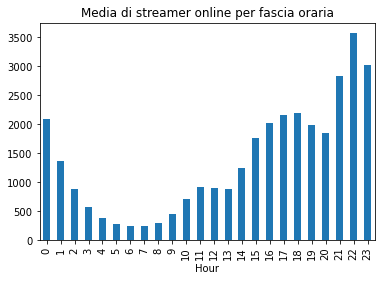

In [16]:
streamon.plot(kind='bar', legend=False)
plt.title('Media di streamer online per fascia oraria')

Text(0.5, 1.0, 'Media di spettatori online per fascia oraria')

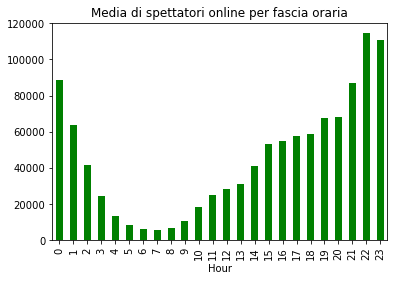

In [17]:
specton.plot(kind='bar', color= 'green', legend= False)
plt.title('Media di spettatori online per fascia oraria')

In [18]:
streamer_dataset = pd.read_csv('https://raw.githubusercontent.com/gianscuri/Twitch_Community_Graph/main/DataProcessing/Streamer_dataset.csv')

In [19]:
streamer_dataset.shape[0] #numero streamer analizzati

2977

In [22]:
stats=streamer_dataset.describe()

In [23]:
stats.head()

,ID_streamer,minutes_live,viewer_mean,viewer_peak,spect_mean,spect_tot
count,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000,2977.000000
mean,1488.000000,1466.684582,121.908969,313.533759,83.692308,1656.022506
std,859.530201,1735.805536,565.179815,1389.299783,406.932335,7450.436019
min,0.000000,15.000000,10.000000,11.000000,0.000000,10.000000
25%,744.000000,345.000000,14.000000,30.000000,9.000000,82.000000


In [24]:
stats.drop(['ID_streamer', 'viewer_mean', 'viewer_peak','spect_mean'], axis=1, inplace=True)
stats.drop('count', axis=0, inplace=True)

In [25]:
stats.rename(columns= {'minutes_live': 'minuti trascorsi in live',
                      'spect_tot': 'spettatori totali'}, inplace=True)

In [26]:
stats

,minuti trascorsi in live,spettatori totali
mean,1466.684582,1656.022506
std,1735.805536,7450.436019
min,15.000000,10.000000
25%,345.000000,82.000000
50%,960.000000,231.000000
75%,2010.000000,801.000000
max,19125.000000,157718.000000


In [3]:
games = pd.read_csv("https://raw.githubusercontent.com/gianscuri/Twitch_Community_Graph/main/DataProcessing/Games_dataset.csv")

In [4]:
games.shape

(1144, 7)

In [5]:
games.head()

,idGame,gameName,steamName,developer,publisher,releaseDate,categories
0,0,Monster Hunter Generations Ultimate,NaN,NaN,NaN,NaN,NaN
1,1,Alice: Madness Returns,Alice: Madness Returns,Spicy Horse Games,Electronic Arts,2011-06-17,3D Platformer; Action-Adventure; Hack and Slas...
2,2,Hold Fast,NaN,NaN,NaN,NaN,NaN
3,3,Pokémon Trading Card Game Online,NaN,NaN,NaN,NaN,NaN
4,4,Witch It,Witch It,Barrel Roll Games,Daedalic Entertainment,2020-10-22,Multiplayer; Funny; Casual; Action; Indie; Hid...


In [9]:
games.dtypes

idGame          int64
gameName       object
steamName      object
developer      object
publisher      object
releaseDate    object
categories     object
dtype: object

In [10]:
games['releaseDate'] =  pd.to_datetime(games['releaseDate'], format='%Y-%m-%d') #convert in datetime object

In [16]:
games2022= games[games['releaseDate']>='2022-01-01']
games2022

,idGame,gameName,steamName,developer,publisher,releaseDate,categories
6,6,The Stanley Parable: Ultra Deluxe,The Stanley Parable: Ultra Deluxe,Crows Crows Crows,NaN,2022-04-27,Comedy; Multiple Endings; Choices Matter; Walk...
93,93,Life is Strange Remastered,Life is Strange Remastered,Deck Nine,Square Enix,2022-02-01,Choices Matter; Female Protagonist; Story Rich...
136,136,Yu-Gi-Oh! Master Duel,Yu-Gi-Oh! Master Duel,Konami Digital Entertainment,NaN,2022-01-18,Card Game; Free to Play; Strategy; Trading Car...
137,137,Source of Madness,Source of Madness,Carry Castle,Thunderful Publishing,2022-05-11,Rogue-lite; Lovecraftian; Action; Action RPG; ...
146,146,Eiyuden Chronicle: Rising,Eiyuden Chronicle: Rising,NatsumeAtari,505 Games,2022-05-10,Adventure; RPG; Action RPG; Action-Adventure; ...
187,187,Bakery Simulator,Bakery Simulator,Live Motion Games,Ultimate Games S.A.,2022-05-03,Simulation; Time Management; Indie; Economy; R...
200,200,Lost Ark,Lost Ark,Smilegate RPG,Amazon Games,2022-02-11,MMORPG; Free to Play; Action RPG; RPG; Action;...
219,219,Vampire: The Masquerade - Bloodhunt,Vampire: The Masquerade - Bloodhunt,Sharkmob AB,NaN,2022-04-27,Battle Royale; Vampire; PvP; Third-Person Shoo...
251,251,Total War: Warhammer III,Total War: WARHAMMER III,CREATIVE ASSEMBLY,SEGA,2022-02-16,Early Access; Strategy; Turn-Based Strategy; G...
297,297,Brigandine: The Legend of Runersia,Brigandine The Legend of Runersia,Happinet,NaN,2022-05-10,Strategy; Turn-Based Strategy; Turn-Based Tact...


In [19]:
games2022.shape[0]

46

In [18]:
games2021= games[(games['releaseDate']>='2021-01-01') & (games['releaseDate']<'2022-01-01') ]
games2021.shape[0]

78

In [20]:
games2020= games[(games['releaseDate']>='2020-01-01') & (games['releaseDate']<'2021-01-01') ]
games2020.shape[0]

41

In [21]:
games2019= games[(games['releaseDate']>='2019-01-01') & (games['releaseDate']<'2020-01-01') ]
games2019.shape[0]

31

In [22]:
games2018= games[(games['releaseDate']>='2019-01-01') & (games['releaseDate']<'2020-01-01') ]
games2018.shape[0]

31

In [33]:
games[games['releaseDate']==games['releaseDate'].min() ]

,idGame,gameName,steamName,developer,publisher,releaseDate,categories
381,381,The Curse of Monkey Island,The Curse of Monkey Island,LucasArts,NaN,1997-10-31,"""1990s""; Point & Click; Cult Classic; Adventur..."


In [34]:
games[games['releaseDate']==games['releaseDate'].max() ]

,idGame,gameName,steamName,developer,publisher,releaseDate,categories
380,380,Card Shark,Card Shark,Nerial,Devolver Digital,2022-06-02,Indie; Stealth; Story Rich; Historical; Myster...


In [38]:
games_contemp= games[(games['releaseDate']>='2022-05-05') & (games['releaseDate']<='2022-05-19') ] #periodo di acquisizione dati da Twitch
games_contemp.shape[0]

11

In [39]:
games_contemp

,idGame,gameName,steamName,developer,publisher,releaseDate,categories
137,137,Source of Madness,Source of Madness,Carry Castle,Thunderful Publishing,2022-05-11,Rogue-lite; Lovecraftian; Action; Action RPG; ...
146,146,Eiyuden Chronicle: Rising,Eiyuden Chronicle: Rising,NatsumeAtari,505 Games,2022-05-10,Adventure; RPG; Action RPG; Action-Adventure; ...
297,297,Brigandine: The Legend of Runersia,Brigandine The Legend of Runersia,Happinet,NaN,2022-05-10,Strategy; Turn-Based Strategy; Turn-Based Tact...
473,473,V Rising,V Rising,Stunlock Studios,NaN,2022-05-17,Survival; Open World; Vampire; Crafting; PvP; PvE
603,603,"Warhammer 40,000: Chaos Gate - Daemonhunters","Warhammer 40,000: Chaos Gate - Daemonhunters",Complex Games,Frontier Foundry,2022-05-05,Warhammer 40K; Turn-Based Strategy; Strategy R...
720,720,Arma Reforger,Arma Reforger,Bohemia Interactive,NaN,2022-05-17,Action; Simulation; Strategy; Shooter; Sandbox...
753,753,Ultimate Epic Battle Simulator 2,Ultimate Epic Battle Simulator 2,Brilliant Game Studios,NaN,2022-05-12,Simulation; Action; Strategy; God Game; Sandbo...
820,820,Citizen Sleeper,Citizen Sleeper,Jump Over The Age,Fellow Traveller,2022-05-05,RPG; Cyberpunk; Choices Matter; Tabletop; Expl...
834,834,We Were Here Forever,We Were Here Forever,Total Mayhem Games,NaN,2022-05-10,Exploration; Puzzle; Online Co-Op; Escape Room...
1007,1007,Little Witch in the Woods,Little Witch in the Woods,SUNNY SIDE UP,NaN,2022-05-16,Cute; Pixel Graphics; Funny; RPG; Magic; Relaxing


In [41]:
games_contemp[['gameName',  'categories']]

,gameName,categories
137,Source of Madness,Rogue-lite; Lovecraftian; Action; Action RPG; ...
146,Eiyuden Chronicle: Rising,Adventure; RPG; Action RPG; Action-Adventure; ...
297,Brigandine: The Legend of Runersia,Strategy; Turn-Based Strategy; Turn-Based Tact...
473,V Rising,Survival; Open World; Vampire; Crafting; PvP; PvE
603,"Warhammer 40,000: Chaos Gate - Daemonhunters",Warhammer 40K; Turn-Based Strategy; Strategy R...
720,Arma Reforger,Action; Simulation; Strategy; Shooter; Sandbox...
753,Ultimate Epic Battle Simulator 2,Simulation; Action; Strategy; God Game; Sandbo...
820,Citizen Sleeper,RPG; Cyberpunk; Choices Matter; Tabletop; Expl...
834,We Were Here Forever,Exploration; Puzzle; Online Co-Op; Escape Room...
1007,Little Witch in the Woods,Cute; Pixel Graphics; Funny; RPG; Magic; Relaxing


Text(0.5, 1.0, 'Videogiochi usciti negli ultimi 5 anni presenti su steamDB')

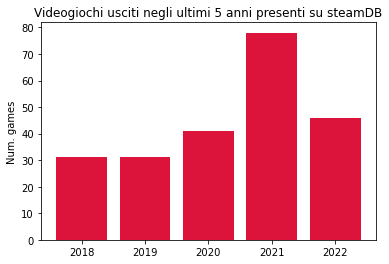

In [35]:
vals=[games2018.shape[0], games2019.shape[0], games2020.shape[0],games2021.shape[0],games2022.shape[0]]
inds=range(len(vals))
labels=["2018","2019","2020","2021","2022"]

fig,ax = plt.subplots()
rects = ax.bar(inds, vals, color='crimson')
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
ax.set_ylabel('Num. games')
ax.set_title('Videogiochi usciti negli ultimi 5 anni presenti su steamDB')

In [30]:
games['developer'].value_counts().to_frame().head(10)

,developer
"CAPCOM Co., Ltd.",14
Square Enix,12
Valve,8
Ubisoft Montreal,6
Arc System Works,6
Capcom,6
Infinity Ward,6
Rockstar Games,5
Konami Digital Entertainment,5
BANDAI NAMCO Studios Inc.,5
